In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.plots.main_results_tables import preprocess

In [3]:
from scipy.stats import sem
import numpy as np

In [4]:
import pandas as pd

In [5]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20201002_500+20201018', 'source_analysis.pkl')
df_main_result = pd.read_pickle(f_main_result).sort_index()
assert df_main_result.index.unique

In [6]:
f_main_result_perf = join(dir_dict['analyses'], 'tang_refactored', '20201002', 'main_result_0,500.pkl')
df_main_result_perf = pd.read_pickle(f_main_result_perf)
f_main_result_2 = join(dir_dict['analyses'], 'tang_refactored', '20201018', 'main_result_0,500.pkl')

df_main_result_perf = pd.concat([
    df_main_result_perf,
    pd.read_pickle(f_main_result_2),
], axis=0).sort_index()
assert df_main_result_perf.index.unique

In [7]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       350              4972   
                                                                                                  700              4972   
                                                                                                  1400             4972   
                                                                                     cm-last      350              4972   
                                                                                                  700              4972   
...                                                                                                                 ...   
softplus True                 poisson   1          6         16          1           legacy       700             16988   
                                                                                                  1400            16988   
                                                             32          1           legacy       350             53580   
                                                                                                  700             53580   
                                                                                                  1400            53580   

                                                                                                                                                source_analysis  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8           1           cm-avg       350                          {('I', 'B1'): 3.490784287850488}  
                                                                                                  700                          {('I', 'B1'): 6.429953607214429}  
                                                                                                  1400                         {('I', 'B1'): 7.851196342310914}  
                                                                                     cm-last      350                          {('I', 'B1'): 3.490784287850488}  
                                                                                                  700                          {('I', 'B1'): 6.429953607214429}  
...                                                                                                                                                         ...  
softplus True                 poisson   1          6         16          1           legacy       700         {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 28.20494...  
                                                                                                  1400        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 26.11062...  
                                                             32          1           legacy       350         {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 1.065455...  
                                                                                                  700         {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 6.538931...  
                                                                                                  1400        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 16.96391...  

[8784 rows x 2 columns]

In [8]:
df_main_result_perf

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       350               0.260392   
                                                                                                  700               0.345669   
                                                                                                  1400              0.392034   
                                                                                     cm-last      350               0.260392   
                                                                                                  700               0.345669   
...                                                                                                                      ...   
softplus True                 poisson   1          6         16          1           legacy       700               0.414992   
                                                                                                  1400              0.459499   
                                                             32          1           legacy       350               0.352038   
                                                                                                  700               0.411811   
                                                                                                  1400              0.478902   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           1           cm-avg       350            0.242842   
                                                                                                  700            0.322136   
                                                                                                  1400           0.364931   
                                                                                     cm-last      350            0.242842   
                                                                                                  700            0.322136   
...                                                                                                                   ...   
softplus True                 poisson   1          6         16          1           legacy       700            0.385274   
                                                                                                  1400           0.425949   
                                                             32          1           legacy       350            0.326924   
                                                                                                  700            0.382036   
                                                                                                  1400           0.443590   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           1           cm-avg       350           0.449782   
                                                                                                  700           0.527187   
                                                                                                  1400          0.573960   
                                                                                     cm-last      350           0.449782   
                                                                           

In [9]:
assert df_main_result.index.equals(df_main_result_perf.index)

In [10]:
def remove_high_cls(df_this):
    df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls') <= 7]
    return df_this.sort_index()

df_main_result = remove_high_cls(df_main_result)
df_main_result_perf = remove_high_cls(df_main_result_perf)

assert df_main_result.index.equals(df_main_result_perf.index)

In [11]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        assert len(key) >= 2 and len(key) <= 9
        ret[len(key)-2] += v  # -2 because minimal length of key is 2 (I + one Conv)
    ret = ret/ret.sum()
    return ret

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))
del df_main_result['source_analysis']

In [12]:
# show mean vs sem, for different cls

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
from scipy.spatial import distance

In [15]:
# check difference of source analysis vec among different nuisance parameters.
# Ideally I'd like to remove ALL nuisance parameters by averaging them out.

def check_nuisance_parameters(df_this):
    for param_name in ['act_fn', 'loss_type', 'ff_1st_bn_before_act', 'model_seed']:
        unique_vals = df_this.index.get_level_values(param_name).unique().tolist()
        assert len(unique_vals) == 2
        dd1 = df_this.xs(unique_vals[0], level=param_name)
        dd2 = df_this.xs(unique_vals[1], level=param_name)
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        print(param_name)
        assert dd1.index.equals(dd2.index)
        cosine_sim = [distance.cosine(x, y) for x, y in zip(
            dd1['source_analysis_vec'].values,
            dd2['source_analysis_vec'].values
        )]
        ax.hist(cosine_sim, bins=20)
        plt.show()

act_fn


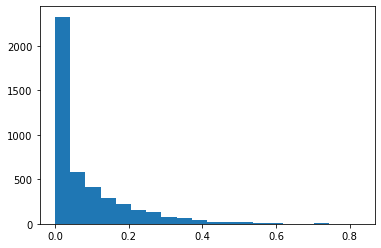

loss_type


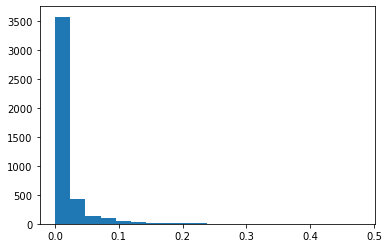

ff_1st_bn_before_act


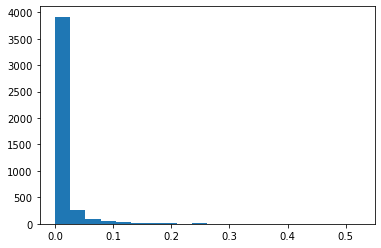

model_seed


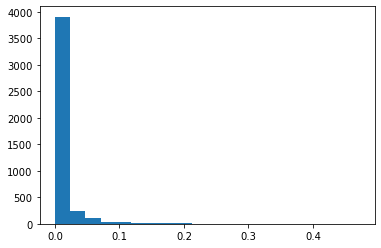

In [16]:
check_nuisance_parameters(df_main_result)
# act fn matters. other ones almost do not matter.
# let's reduce them out!!!

In [17]:
def get_reduced_data(df_this):
    axes_to_reduce = [
#         'loss_type', 'ff_1st_bn_before_act',
        'model_seed'
    ]
    columns, df_ff, df_r = preprocess(df_this, axes_to_reduce=axes_to_reduce, max_cls=None)
    return {
        'df_ff': df_ff,
        'df_r': df_r,
        'columns': columns,
    }

In [18]:
df_main_result_reduced_dict = get_reduced_data(df_main_result)
df_main_result_perf_reduced_dict = get_reduced_data(df_main_result_perf)

In [19]:
df_main_result_reduced_dict['df_ff']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                   
relu     False                mse       2         8           350                 4972.0   
                                                              700                 4972.0   
                                                              1400                4972.0   
                                                  16          350                 7660.0   
                                                              700                 7660.0   
...                                                                                  ...   
softplus True                 poisson   6         16          700                16988.0   
                                                              1400               16988.0   
                                                  32          350                53580.0   
                                                              700                53580.0   
                                                              1400               53580.0   

                                                                                          source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                                             
relu     False                mse       2         8           350         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              700         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              1400        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                  16          350         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              700         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                                                            ...   
softplus True                 poisson   6         16          700         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              1400        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                  32          350         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              700         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              1400        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   

                                                                          num_param_sem  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                  
relu     False                mse       2         8           350                   0.0   
                                                              700                   0.0   
                                                              1400                  0.0   
                                                  16          350                   0.0   
                                                              700                   0.0   
...                                                                                 ...   
softplus True                 poisson   6         16          700                   0.0   
                                                              1400                  0.0   
                                                  32          350                   0.0   
                                                              700                   0.0   
                                                              1400                  0.0   

                                                                                           source_analysis_vec_sem  
act_fn   ff_1st_bn_before_act loss_type n

In [20]:
df_main_result_reduced_dict['df_r']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                   
relu     False                mse       8           2           cm-avg       350        3                  5564.0   
                                                                                        5                  6748.0   
                                                                             700        3                  5564.0   
                                                                                        5                  6748.0   
                                                                             1400       3                  5564.0   
...                                                                                                           ...   
softplus True                 poisson   32          7           inst-last    350        5                 44940.0   
                                                                             700        3                 26060.0   
                                                                                        5                 44940.0   
                                                                             1400       3                 26060.0   
                                                                                        5                 44940.0   

                                                                                                                            source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     False                mse       8           2           cm-avg       350        3          [0.6765230973497056, 0.3234769026502943, 0.0, ...   
                                                                                        5          [0.0, 0.6625920521396673, 0.3374079478603328, ...   
                                                                             700        3          [0.5528679666570914, 0.4471320333429087, 0.0, ...   
                                                                                        5          [0.0, 0.6192367371596432, 0.3807632628403568, ...   
                                                                             1400       3          [0.47202125422212804, 0.527978745777872, 0.0, ...   
...                                                                                                                                              ...   
softplus True                 poisson   32          7           inst-last    350        5          [0.0, 0.04773993207723466, 0.08249824231164513...   
                                                                             700        3          [0.054462136628163516, 0.058652436722751014, 0...   
                                                                                        5          [0.0, 0.02337192940044888, 0.04822952443623184...   
                                                                             1400       3          [0.03762662411857341, 0.04606616932668617, 0.0...   
                                                                                        5          [0.0, 0.024018688926738318, 0.0481049066715147...   

                                                                                                   num_param_sem  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                  
relu     False                mse       8           2           cm-avg       350        3                    0.0   
                                                                                        5                    0.0   
                                                                             700        3                    0.0   
                    

In [21]:
from sklearn.decomposition import PCA

In [22]:
# let's try some PCA on the vectors.
def try_pca(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        for num_layer in df_this.index.get_level_values('num_layer').unique():
            key = (train_keep, num_layer)
            print(key)
            df_this_slice = df_this.xs(key=key, level=('train_keep', 'num_layer'))
            data_this = np.array([x for x in df_this_slice['source_analysis_vec_mean'].values])
            assert data_this.ndim == 2
            assert data_this.shape[1] == 8
            pca = PCA(random_state=0)
            pca.fit(data_this)
            print(np.cumsum(pca.explained_variance_ratio_))

In [22]:
try_pca(df_main_result_reduced_dict['df_r'])
# 4 dim is enough. ideally I want 1.

(1280, 3)
[0.45291247 0.64558247 0.80215387 0.8960833  0.95858298 1.
 1.         1.        ]
(1280, 5)
[0.47110948 0.64788123 0.80881727 0.9004653  0.95955928 1.
 1.         1.        ]
(2560, 3)
[0.43655374 0.61699973 0.77009198 0.87904723 0.95105142 1.
 1.         1.        ]
(2560, 5)
[0.45580371 0.63474739 0.77804421 0.88171867 0.95035593 1.
 1.         1.        ]
(5120, 3)
[0.42544881 0.61496567 0.75119292 0.86621803 0.9449441  1.
 1.         1.        ]
(5120, 5)
[0.4473028  0.63560625 0.75658809 0.86929025 0.94532356 1.
 1.         1.        ]


In [23]:
df_main_result_reduced_dict['df_ff']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                   
relu     False                mse       2         8           1280               17461.0   
                                                              2560               17461.0   
                                                              5120               17461.0   
                                                  16          1280               20509.0   
                                                              2560               20509.0   
...                                                                                  ...   
softplus True                 poisson   6         48          2560              127501.0   
                                                              5120              127501.0   
                                                  64          1280              210893.0   
                                                              2560              210893.0   
                                                              5120              210893.0   

                                                                                          source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                                             
relu     False                mse       2         8           1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              5120        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                  16          1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                                                            ...   
softplus True                 poisson   6         48          2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                  64          1280        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   

                                                                          num_param_sem  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                  
relu     False                mse       2         8           1280                  0.0   
                                                              2560                  0.0   
                                                              5120                  0.0   
                                                  16          1280                  0.0   
                                                              2560                  0.0   
...                                                                                 ...   
softplus True                 poisson   6         48          2560                  0.0   
                                                              5120                  0.0   
                                                  64          1280                  0.0   
                                                              2560                  0.0   
                                                              5120                  0.0   

                                                                                           source_analysis_vec_sem  
act_fn   ff_1st_bn_before_act loss_type n

In [24]:
df_main_result_reduced_dict['df_r']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                   
relu     False                mse       8           2           cm-avg       1280       3                 18053.0   
                                                                                        5                 19237.0   
                                                                             2560       3                 18053.0   
                                                                                        5                 19237.0   
                                                                             5120       3                 18053.0   
...                                                                                                           ...   
softplus True                 poisson   64          7           inst-last    1280       5                175181.0   
                                                                             2560       3                100557.0   
                                                                                        5                175181.0   
                                                                             5120       3                100557.0   
                                                                                        5                175181.0   

                                                                                                                            source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     False                mse       8           2           cm-avg       1280       3          [0.7363191350448292, 0.2636808649551708, 0.0, ...   
                                                                                        5          [0.0, 0.6735457555971944, 0.32645424440280557,...   
                                                                             2560       3          [0.6966464370065532, 0.30335356299344685, 0.0,...   
                                                                                        5          [0.0, 0.6243663846835048, 0.3756336153164952, ...   
                                                                             5120       3          [0.703146532229733, 0.296853467770267, 0.0, 0....   
...                                                                                                                                              ...   
softplus True                 poisson   64          7           inst-last    1280       5          [0.0, 0.10772983056168726, 0.13986493303085998...   
                                                                             2560       3          [0.14730467321395593, 0.12595936312687592, 0.1...   
                                                                                        5          [0.0, 0.10974942862026668, 0.14205627438606788...   
                                                                             5120       3          [0.13811901914318492, 0.11788454311842322, 0.1...   
                                                                                        5          [0.0, 0.07486300192731053, 0.1082920533305595,...   

                                                                                                   num_param_sem  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                  
relu     False                mse       8           2           cm-avg       1280       3                    0.0   
                                                                                        5                    0.0   
                                                                             2560       3                    0.0   
                    

In [23]:
def merge_reduced_dict(dict_vec, dict_perf):
    # merge df_r
    assert dict_vec['df_r'].index.equals(dict_perf['df_r'].index)
    df_r = pd.concat([
        dict_vec['df_r'][['source_analysis_vec_mean']],
        dict_perf['df_r'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # merge df_ff
    
    assert dict_vec['df_ff'].index.equals(dict_perf['df_ff'].index)
    df_ff = pd.concat([
        dict_vec['df_ff'][['source_analysis_vec_mean']],
        dict_perf['df_ff'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # return 
    return {
        'df_r': df_r,
        'df_ff': df_ff,
    }

In [24]:
merged_reduced_dict = merge_reduced_dict(
    df_main_result_reduced_dict,
    df_main_result_perf_reduced_dict
)



In [25]:
def plot_vec_bars(ax, df_this):
    data = np.asarray([x for x in df_this['source_analysis_vec_mean'].values])
    num_case, num_col = data.shape
    assert num_col == 8
    
    perf = df_this['cc2_normed_avg_mean']
    print(perf.mean(), perf.std())
    
    plt_vec_bars_inner(ax, data)

In [26]:
def plt_vec_bars_inner(ax, data, perf=None):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    
    
    ax.bar(x=np.arange(1,9), height=data_mean, yerr=data_std)
    ax.set_xlabel('# of convs inside recurrent blocks')
    ax.set_ylabel('normalized weight')
    if perf is not None:
        assert perf.shape == (data.shape[0],)
        ax.set_title('num case {}, perf {:.4f}+/-{:.4f}'.format(
        data.shape[0], perf.mean(), perf.std()))
    ax.set_ylim(0, 1.0)

In [27]:
from sklearn.cluster import KMeans

In [28]:
def get_clustering(df_this):
    num_cluster = 3
    print(df_this.shape)
    perf_vec = df_this['cc2_normed_avg_mean'].values
    src_analysis_vec = np.asarray([x.tolist() for x in df_this['source_analysis_vec_mean'].values])
    assert src_analysis_vec.ndim == 2
    assert src_analysis_vec.shape[1] == 8
    
    # do clustering.
    # for each cluster, show cluster size, vec_bars, and spread of performance.
    # 1 dimensional
    y = KMeans(n_clusters=num_cluster, random_state=0).fit_predict(perf_vec[:,np.newaxis])
    

    ret = {
        'y': y,
        'perf_vec': perf_vec,
        'src_analysis_vec': src_analysis_vec,
        'num_cluster': num_cluster,
    }
    
    return ret

In [29]:
def plot_clustering(*, y, perf_vec, src_analysis_vec, num_cluster, title=None):
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=num_cluster, figsize=(20, 3))
    if title is not None:
        fig.suptitle(title)
    axes = axes.ravel()
    
    perf_mean_vec = []
    for idx in range(num_cluster):
        perf_mean_vec.append(perf_vec[y==idx].mean())
    idx_good = np.argsort(perf_mean_vec)[::-1]
    
    for idx, ax in zip(idx_good, axes):
        y_this = y==idx
        plt_vec_bars_inner(ax, src_analysis_vec[y_this], perf_vec[y_this])
    plt.show()

In [30]:
def show_scatter_plots(reduced_dict):
    df_ff, df_r = reduced_dict['df_ff'], reduced_dict['df_r']
    clustering_result_dict = []
    assert np.array_equal(
        df_r.index.get_level_values('train_keep').unique(),
        df_ff.index.get_level_values('train_keep').unique()
    )
    for train_keep in df_r.index.get_level_values('train_keep').unique():
        df_r_this_this_train_size = df_r.xs(train_keep, level='train_keep')
        df_ff_this_per_train_size = df_ff.xs(train_keep, level='train_keep')
        for readout_type in df_r_this_this_train_size.index.get_level_values('readout_type').unique():
            df_r_this_readout = df_r_this_this_train_size.xs(readout_type, level='readout_type')
            index_out_channel = df_r_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_r_this_readout.index.get_level_values('num_layer').values
            
            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()
            
            for key_this in unique_channel_layer:                
                key_this = tuple(key_this)
                (c_this, l_this) = key_this
                global_key = {
                    'train_keep': train_keep,
                    'readout_type': readout_type,
                    'num_channel': c_this,
                    'num_layer': l_this,
                }
                
                
                df_this = df_r_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                df_ff_this = df_ff_this_per_train_size.xs(key=(c_this, l_this), level=('out_channel', 'num_layer')).copy()
                df_ff_this['rcnn_bl_cls'] = 1
                df_ff_this = df_ff_this.set_index('rcnn_bl_cls', append=True)
                
                assert df_ff_this.shape[0]*6 == df_this.shape[0]
                
                # reorder index to make sure it's ok to concat them
                assert set(df_ff_this.index.names) == set(df_this.index.names)
                df_ff_this = df_ff_this.reorder_levels(
                    order=sorted(df_ff_this.index.names),
                    axis=0
                ).sort_index()
                
                df_this = df_this.reorder_levels(
                    order=sorted(df_this.index.names),
                    axis=0
                ).sort_index()
                
                global_key.update(
                    {
                        'clustering': get_clustering(
                            pd.concat([df_this, df_ff_this], axis=0))
                    }
                )
        
                clustering_result_dict.append(global_key) 

                # let's do clustering over these types

#             print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
#             print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
    return pd.DataFrame(clustering_result_dict, columns=list(clustering_result_dict[0].keys())).set_index(
        ['train_keep','readout_type','num_channel','num_layer'], verify_integrity=True
    )
# clustering_result_dict_global = show_scatter_plots()

In [31]:
clustering_result_dict_global = show_scatter_plots(merged_reduced_dict)

(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)
(56, 2)


In [32]:
def plot_cluster_wrapper(
    clustering_result_dict_this,
    *,
    train_size=None,
    readout_type=None,
    num_c=None,
    num_l=None,
):
    key = (train_size, readout_type, num_c, num_l)
   
    levels = ('train_keep', 'readout_type', 'num_channel', 'num_layer')
    
    # remove None
    keep = [k is not None for k in key]
    key = tuple([k for k in key if k is not None])
    levels = tuple([l for keep_this, l in zip(keep, levels) if keep_this])
    assert len(key) == len(levels)
    
    data_new = clustering_result_dict_this.xs(key=key, level=levels)
    for idx, data in data_new['clustering'].iteritems():
        plot_clustering(**data, title=str(idx))

In [33]:
# plot some slices

# increase train size

# plot_cluster_wrapper(readout_type='cm-avg',num_c=16,num_l=2)

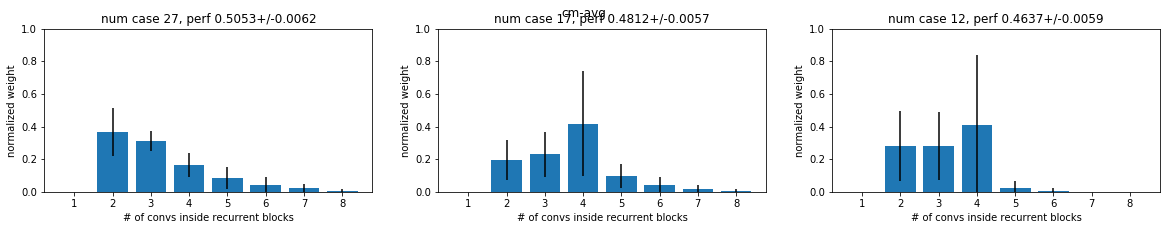

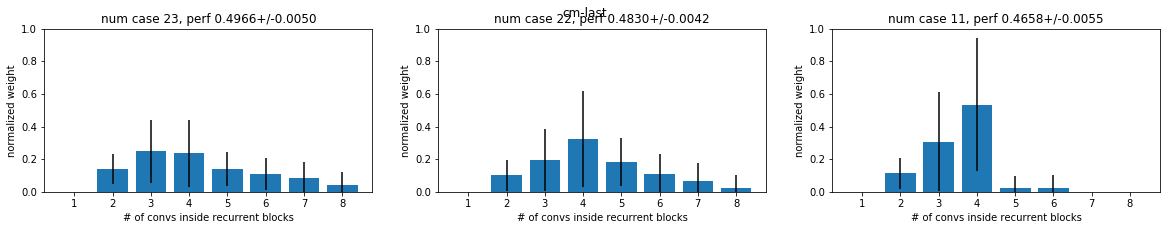

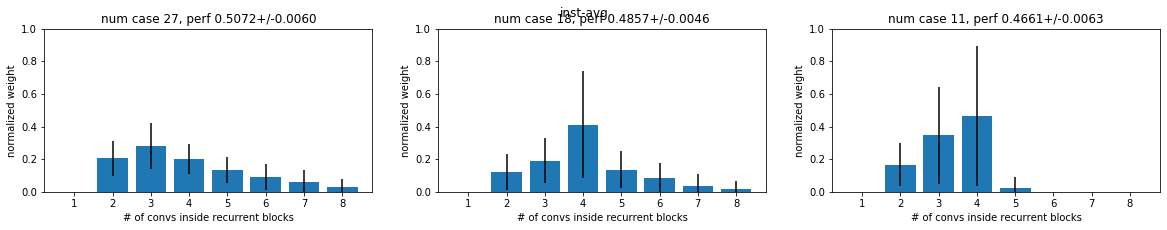

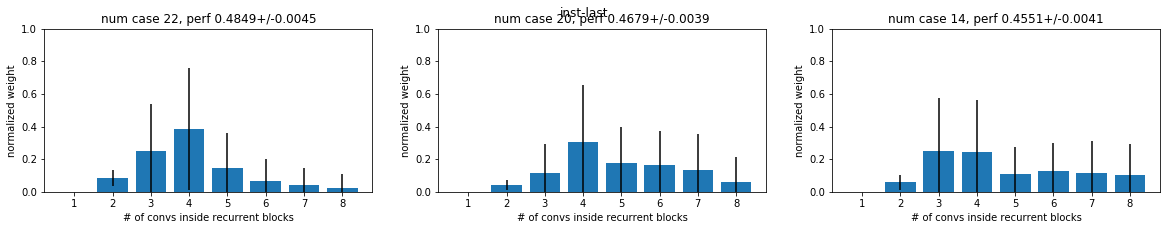

In [37]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=1400,
    num_c=32,
    num_l=5,
)

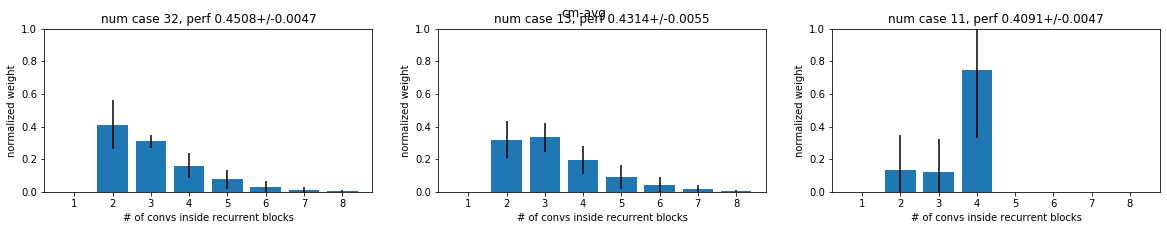

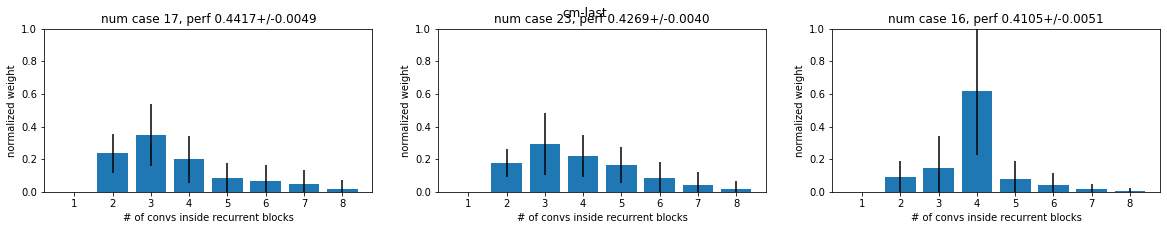

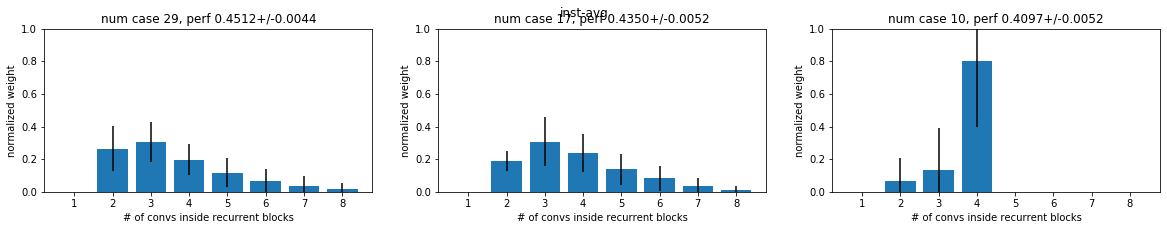

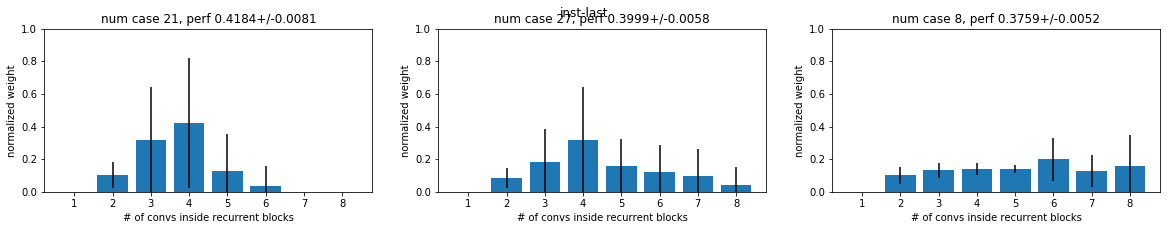

In [38]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=700,
    num_c=32,
    num_l=5,
)

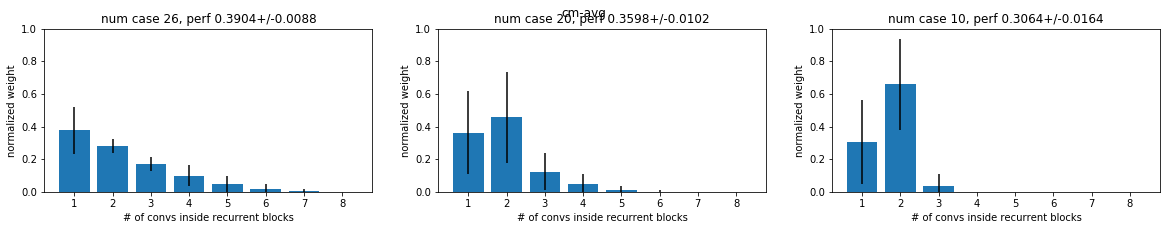

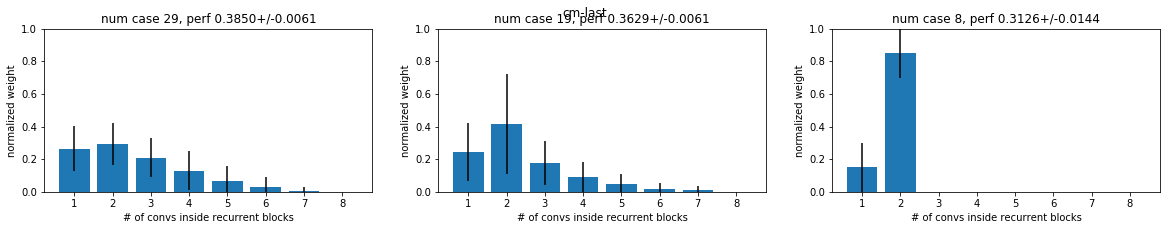

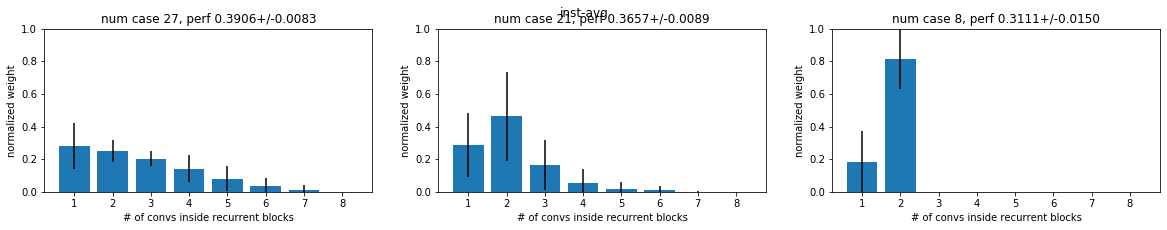

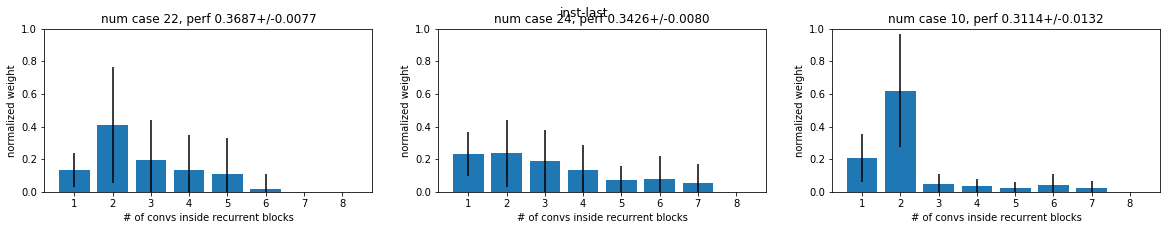

In [39]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=350,
    num_c=32,
    num_l=3,
)

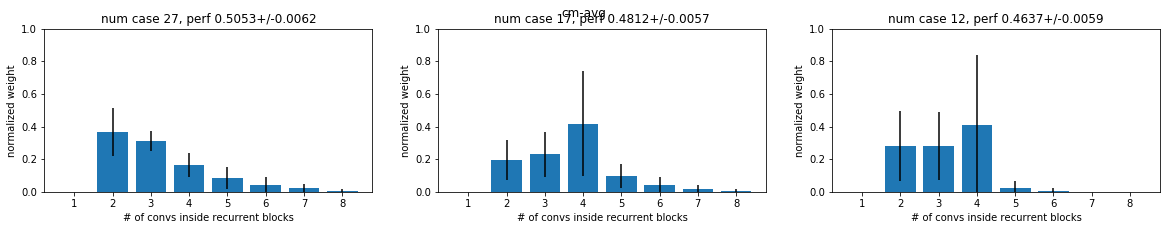

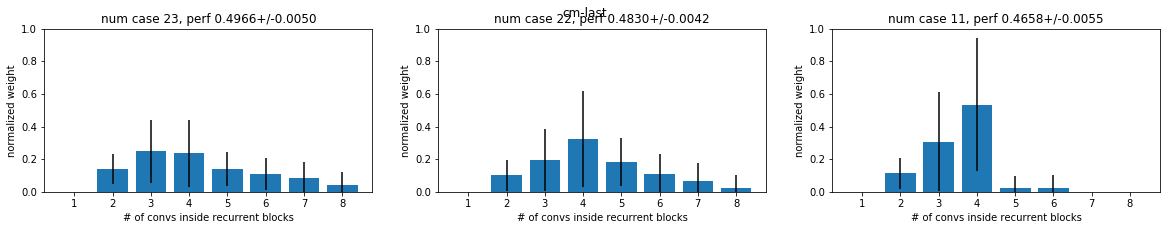

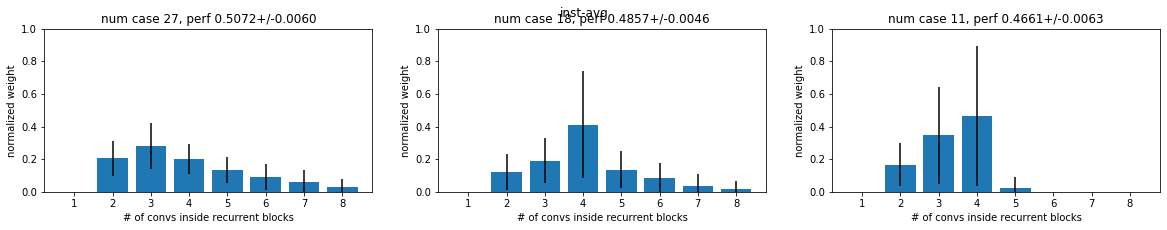

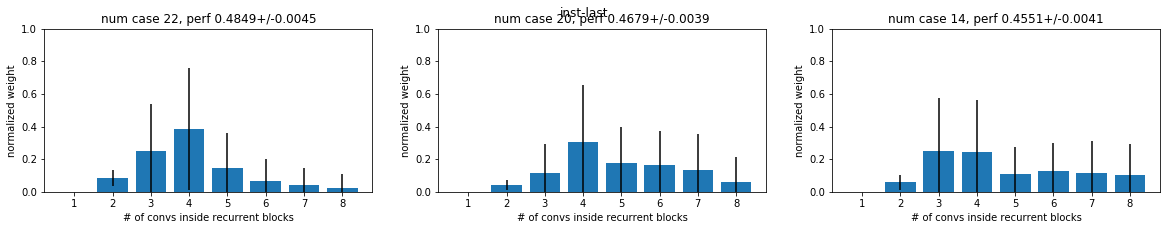

In [40]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=1400,
    num_c=32,
    num_l=5,
)

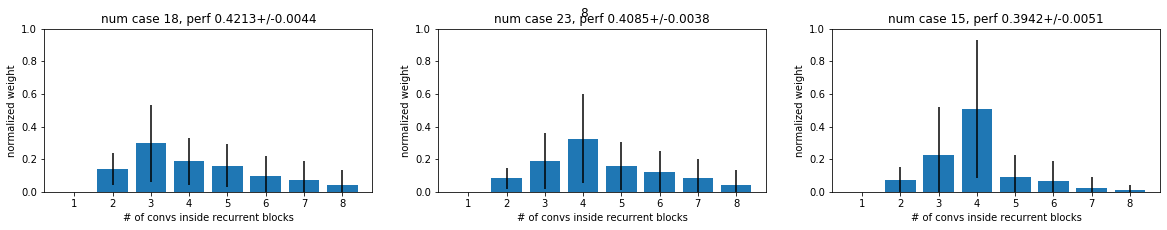

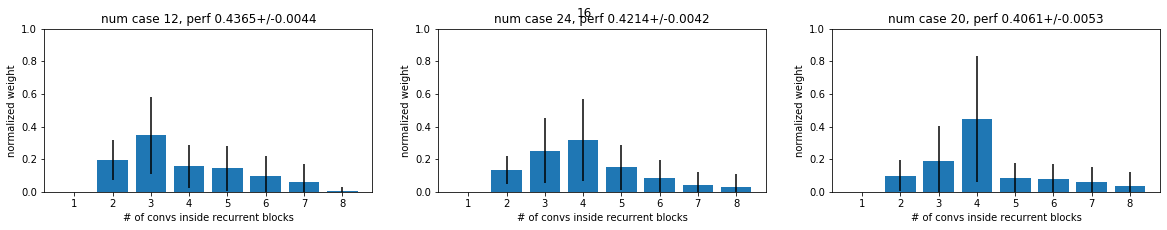

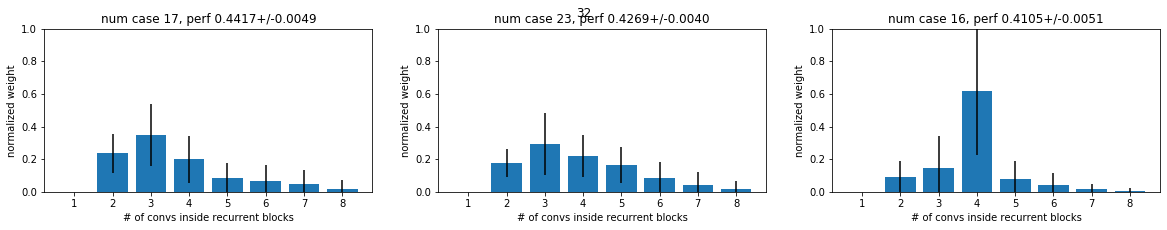

In [41]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=700,
    num_c=None,
    num_l=5,
     readout_type='cm-last',
)

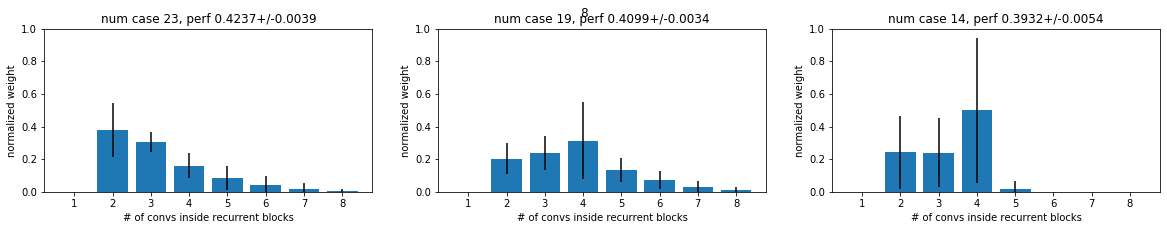

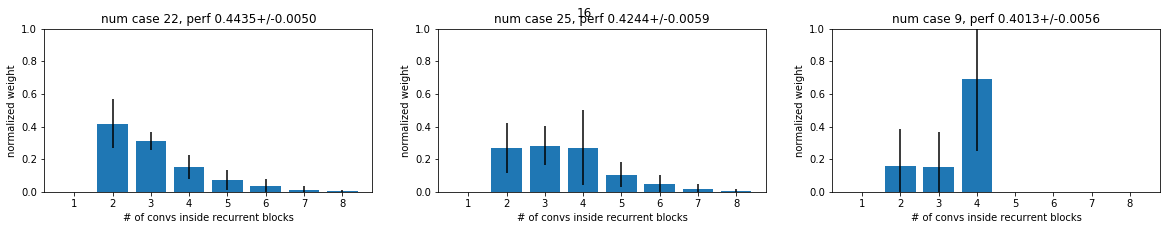

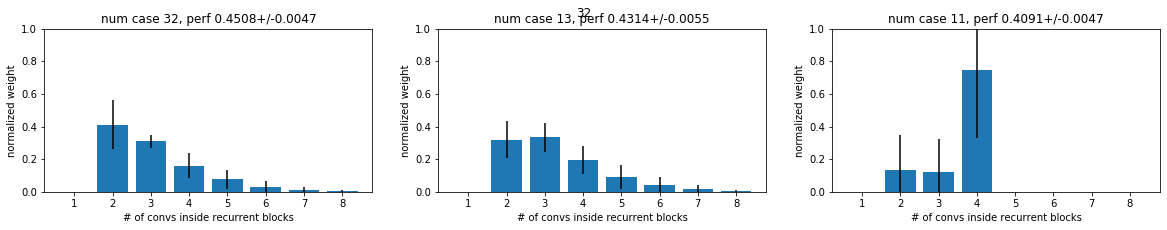

In [43]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=700,
    num_c=None,
    num_l=5,
     readout_type='cm-avg',
)